# ライブラリのインポート

In [35]:
import numpy as np
import scipy.stats  as ss
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.preprocessing as sp

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# データ読み込み

In [36]:
bmi = pd.read_csv("data/sysbp.csv", comment="#")
bmi["SEX"].unique() #　カテゴリ変数の値を確認

array(['Male', 'Female'], dtype=object)

# カテゴリ変数をダミー変数に変換

In [37]:
data = pd.get_dummies(bmi, drop_first=True)
print(data.head())

     BMI   AGE  BPMEDS  SYSBP  SEX_Male
0  26.97  39.0     0.0  106.0         1
1  28.73  46.0     0.0  121.0         0
2  25.34  48.0     0.0  127.5         1
3  28.58  61.0     0.0  150.0         0
4  23.10  46.0     0.0  130.0         0


# 欠損値検査関数の定義

In [39]:
def lack_table(df): 
    import pandas
    '''
    This function is caliculation of lack values from raw data.
    
    Library: pandas, numpy
    
    params
    ---------
    df : DataFrame
            raw data set.
    
    Returns
    --------
    lack_table_ren_columns: pandas.DataFrame
                            Return results lack of raw data.
    '''
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    lack_table = pandas.concat([null_val, percent], axis=1)
    lack_table_ren_columns = lack_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return lack_table_ren_columns

#  欠損値検査

In [40]:
print(lack_table(data))

          欠損数         %
BMI         0  0.000000
AGE         0  0.000000
BPMEDS     61  1.375733
SYSBP      80  1.804240
SEX_Male    0  0.000000


# 欠損値処理

In [41]:
data["BPMEDS"] = data["BPMEDS"].fillna(0).astype(float)
data["SYSBP"] = data["SYSBP"].fillna(data["SYSBP"].median())

In [42]:
print(lack_table(data))

          欠損数    %
BMI         0  0.0
AGE         0  0.0
BPMEDS      0  0.0
SYSBP       0  0.0
SEX_Male    0  0.0


# 散布図作成

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


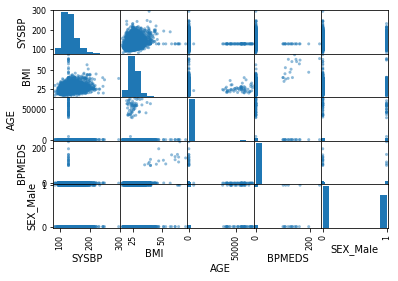

In [44]:
X = data[["BMI", "AGE", "BPMEDS", "SEX_Male"]]# 独立変数
y = data["SYSBP"]# 従属変数

pd.scatter_matrix(data[["SYSBP", "BMI", "AGE", "BPMEDS", "SEX_Male"]])
plt.show()

# 標準化と重回帰分析(statsmodels) 切片あり

In [45]:
# 標準化
X_scale = sp.scale(X)
y_scale = sp.scale(y)

# モデルの設定
model = sm.OLS(y_scale, sm.add_constant(X_scale))

# 回帰分析の実行
results = model.fit()

# 結果を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 10 Dec 2018   Prob (F-statistic):          9.16e-110
Time:                        17:29:32   Log-Likelihood:                -6034.7
No. Observations:                4434   AIC:                         1.208e+04
Df Residuals:                    4429   BIC:                         1.211e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.79e-16      0.014  -4.08e-14      1.0